In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import Reader, Dataset, accuracy
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

# Question 1

In [2]:
dataset_folder = 'movielinks/'
Ratings_file = pd.read_csv(dataset_folder+"ratings.csv",usecols=['userId','movieId','rating']) 
user_ID = Ratings_file.pop('userId').values
movie_ID = Ratings_file.pop('movieId').values
rating = Ratings_file.pop('rating').values
sparsity = len(rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',sparsity)

Sparsity: 0.016999683055613623


# Question 2

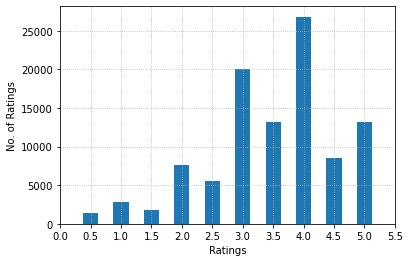

In [3]:
u, inv = np.unique(rating, return_inverse=True)
plt.bar(u, np.bincount(inv), width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('No. of Ratings')
plt.xlabel('Ratings')
plt.savefig('Q2.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 3

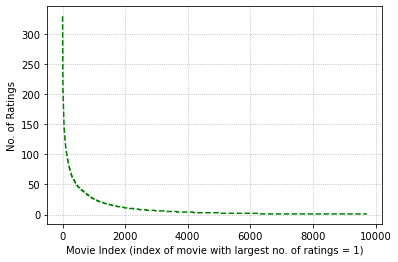

In [4]:
unique, counts = np.unique(movie_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],linestyle='--',color='g')
plt.grid(linestyle=':')
plt.ylabel('No. of Ratings')
plt.xlabel('Movie Index (index of movie with largest no. of ratings = 1)')
plt.savefig('Q3.png',dpi=300,bbox_inches='tight')
plt.show()

In [5]:
movie_count_dict = {} 
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]: 
    for value in x: 
        movie_count_dict[key] = value 
        x.remove(value) 
        break 
print('Top 10 rated movies (Movie ID, Index):')
print(list(movie_count_dict.items())[0:10])

Top 10 rated movies (Movie ID, Index):
[(356, 1), (318, 2), (296, 3), (593, 4), (2571, 5), (260, 6), (480, 7), (110, 8), (589, 9), (527, 10)]


## Question 4

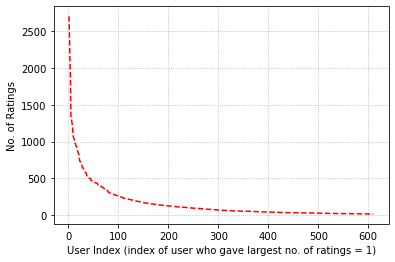

In [6]:
unique, counts = np.unique(user_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],linestyle='--',color='r')
plt.grid(linestyle=':')
plt.ylabel('No. of Ratings')
plt.xlabel('User Index (index of user who gave largest no. of ratings = 1)')
plt.savefig('Q4.png',dpi=300,bbox_inches='tight')
plt.show()

In [7]:
user_count_dict = {} 
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]: 
    for value in x: 
        user_count_dict[key] = value 
        x.remove(value) 
        break 
print('Top 10 users who rated most number of times (User ID, Index):')
print(list(user_count_dict.items())[0:10])

Top 10 users who rated most number of times (User ID, Index):
[(414, 1), (599, 2), (474, 3), (448, 4), (274, 5), (610, 6), (68, 7), (380, 8), (606, 9), (288, 10)]


# Question 6

In [8]:
unique_movie_ID = list(set(movie_ID))
movie_ID_list = []
var_list = []
for j in range(len(unique_movie_ID)):
    indices = [i for i, x in enumerate(movie_ID) if x == unique_movie_ID[j]]
    var = np.var(np.array(rating[indices]))
    movie_ID_list.append(unique_movie_ID[j])
    var_list.append(var)

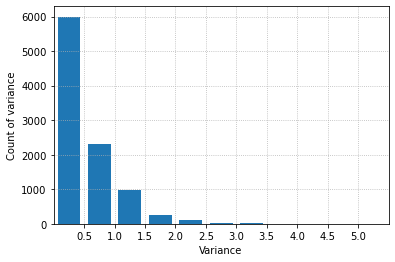

In [9]:
plt.hist(var_list, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance')
plt.ylabel('Count of variance')
plt.savefig('Q6.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 10

In [10]:
reader = Reader(line_format='user item rating timestamp',sep=',',rating_scale=(0.5, 5),skip_lines=1)
ratings_dataset = Dataset.load_from_file(dataset_folder+"ratings.csv",reader=reader)

In [11]:
k = np.arange(2,102,2)
rmse = []
mae = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(KNNWithMeans(k=item,sim_options={'name':'pearson'}),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse.append(np.mean(res['test_rmse']))
    mae.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


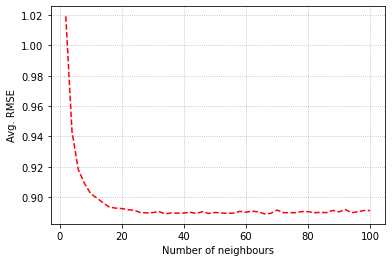

In [12]:
plt.plot(k,rmse,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10a.png',dpi=300,bbox_inches='tight')
plt.show()

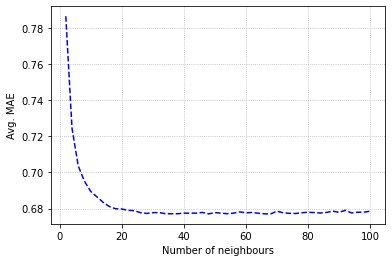

In [13]:
plt.plot(k,mae,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10b.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 12

In [31]:
rmse_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


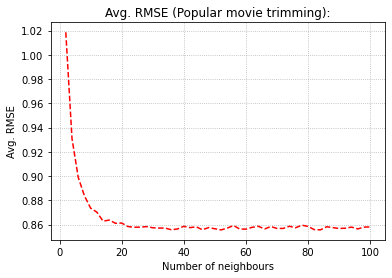

In [32]:
plt.plot(k,rmse_pop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q12.png',dpi=300,bbox_inches='tight')
plt.show()

In [33]:
print("Minimum avg. RMSE (Popular movie trimming):", min(rmse_pop))

Minimum avg. RMSE (Popular movie trimming): 0.855562336401092


## Question 13

In [34]:
rmse_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


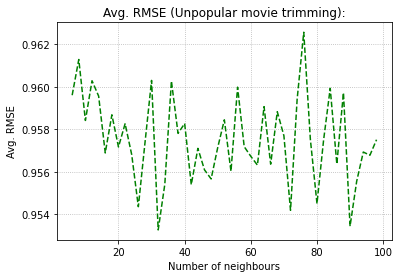

In [62]:
plt.plot(k[2:-1],rmse_unpop[2:-1],linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q13.png',dpi=300,bbox_inches='tight')
plt.show()

In [63]:
print("Minimum avg. RMSE (Unpopular movie trimming):", min(rmse_unpop))

Minimum avg. RMSE (Unpopular movie trimming): 0.9532593034140208


# Question 14

In [23]:
rmse_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


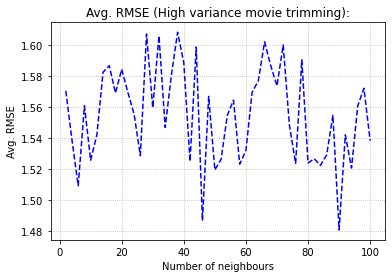

In [25]:
plt.plot(k,rmse_var,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

In [26]:
print("Minimum avg. RMSE (High variance movie trimming):", min(rmse_var))

Minimum avg. RMSE (High variance movie trimming): 1.4807749408081747


# Question 15

In [40]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

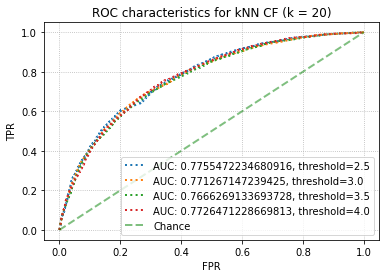

In [56]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN CF (k = 20)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q15.png',dpi=300,bbox_inches='tight')
plt.show() 

# Question 17

In [68]:
k = np.arange(2,52,2)
rmse_NMF = []
mae_NMF = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(NMF(n_factors=item,n_epochs=50,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse_NMF.append(np.mean(res['test_rmse']))
    mae_NMF.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


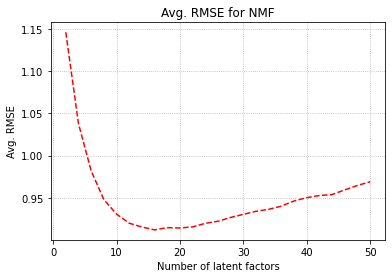

In [87]:
plt.plot(k,rmse_NMF,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE for NMF')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q17a.png',dpi=300,bbox_inches='tight')
plt.show()

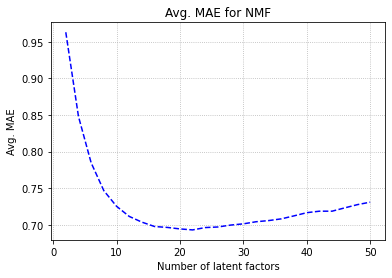

In [88]:
plt.plot(k,mae_NMF,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. MAE for NMF')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of latent factors')
plt.savefig('Q17b.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 18

In [89]:
print("Minimum avg. RMSE (NMF): %f, value of k: %d" % (min(rmse_NMF),k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]))
print("Minimum avg. MAE (NMF): %f, value of k: %d" % (min(mae_NMF),k[[i for i, x in enumerate(mae_NMF) if x == min(mae_NMF)][0]]))

Minimum avg. RMSE (NMF): 0.912293, value of k: 16
Minimum avg. MAE (NMF): 0.692898, value of k: 22


# Question 19

In [82]:
rmse_NMF_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


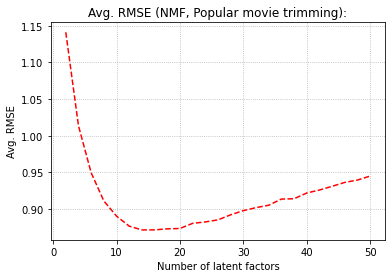

In [85]:
plt.plot(k,rmse_NMF_pop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (NMF, Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q19.png',dpi=300,bbox_inches='tight')
plt.show()

In [86]:
print("Minimum avg. RMSE (NMF, Popular movie trimming):", min(rmse_NMF_pop))

Minimum avg. RMSE (NMF, Popular movie trimming): 0.8716691678332561


# Question 20

In [90]:
rmse_NMF_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


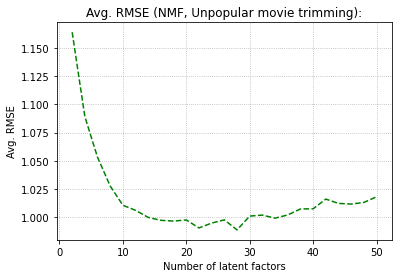

In [91]:
plt.plot(k,rmse_NMF_unpop,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (NMF, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q20.png',dpi=300,bbox_inches='tight')
plt.show()

In [92]:
print("Minimum avg. RMSE (NMF, Unpopular movie trimming):", min(rmse_NMF_unpop))

Minimum avg. RMSE (NMF, Unpopular movie trimming): 0.9884940417020275


# Question 21

In [93]:
rmse_NMF_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


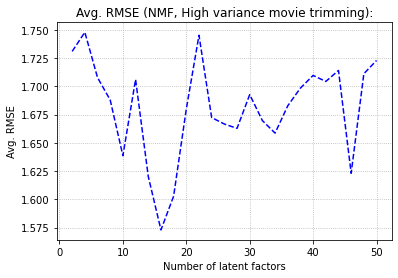

In [99]:
plt.plot(k,rmse_NMF_var,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (NMF, High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q21.png',dpi=300,bbox_inches='tight')
plt.show()

In [95]:
print("Minimum avg. RMSE (NMF, High variance movie trimming):", min(rmse_NMF_var))

Minimum avg. RMSE (NMF, High variance movie trimming): 1.572969068822702


# Question 22

In [100]:
k = k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = NMF(n_factors=k,n_epochs=50,verbose=False).fit(trainset).test(testset)

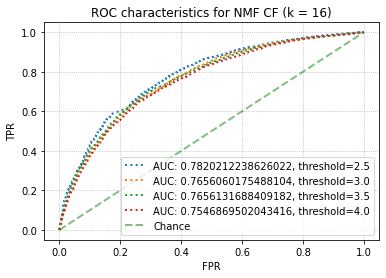

In [101]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for NMF CF (k = 16)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q22.png',dpi=300,bbox_inches='tight')
plt.show() 

# Question 23

In [132]:
genre = pd.read_csv(dataset_folder+'movies.csv',usecols=['movieId','title','genres'])
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
nmf = NMF(n_factors=20,n_epochs=50,verbose=False)
nmf.fit(trainset).test(testset)
U = nmf.pu
V = nmf.qi

In [133]:
cols = [1,3,5,7,11,15,19]
for item in cols:
    print('Column number of V: ',item)
    selected_col = V[:,item]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(genre['genres'][i])
    print('---------------------------------------------')

Column number of V:  1
Drama|Romance
Action|Adventure|Sci-Fi
Comedy|Drama|Romance
Drama
Comedy|Horror
Drama|Film-Noir|Mystery|Romance
Adventure|Drama|Western
Comedy|Drama
Comedy|Drama
Comedy|Drama
---------------------------------------------
Column number of V:  3
Comedy|Drama
Sci-Fi
Crime|Drama|Thriller
Action|Crime
Comedy|Crime|Romance
Horror|Sci-Fi
Comedy|Romance
Action|Adventure|Fantasy
Comedy
Comedy|Romance
---------------------------------------------
Column number of V:  5
Drama
Comedy
Children|Comedy
Horror|Mystery
Drama|Romance
Drama|Romance
Adventure|Children|Comedy
Action|Sci-Fi|Thriller|Western
Drama|Thriller
Comedy|Drama|Romance|Sci-Fi
---------------------------------------------
Column number of V:  7
Drama
Drama|Mystery|Sci-Fi
Action|Crime|Drama|IMAX
Comedy
Children|Drama
Horror|Thriller
Action|Crime|Drama|Thriller
Comedy
Action|Comedy
Horror
---------------------------------------------
Column number of V:  11
Drama
Comedy|Crime
Comedy
Drama
Comedy|Drama
Adventure|Dra

# Question 24

In [135]:
k = np.arange(2,52,2)
rmse_SVD = []
mae_SVD = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(SVD(n_factors=item,n_epochs=20,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse_SVD.append(np.mean(res['test_rmse']))
    mae_SVD.append(np.mean(res['test_mae']))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


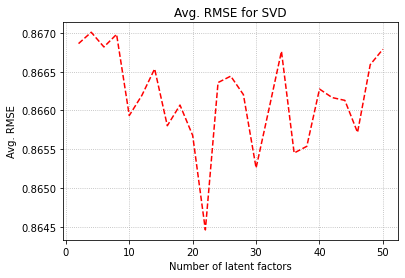

In [136]:
plt.plot(k,rmse_SVD,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE for SVD')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q24a.png',dpi=300,bbox_inches='tight')
plt.show()

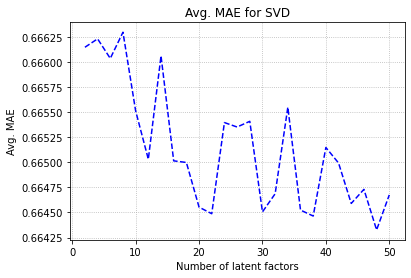

In [137]:
plt.plot(k,mae_SVD,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. MAE for SVD')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of latent factors')
plt.savefig('Q24b.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 25

In [138]:
print("Minimum avg. RMSE (SVD): %f, value of k: %d" % (min(rmse_SVD),k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]))
print("Minimum avg. MAE (SVD): %f, value of k: %d" % (min(mae_SVD),k[[i for i, x in enumerate(mae_SVD) if x == min(mae_SVD)][0]]))

Minimum avg. RMSE (SVD): 0.864458, value of k: 22
Minimum avg. MAE (SVD): 0.664326, value of k: 48


# Question 26

In [139]:
rmse_SVD_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_pop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


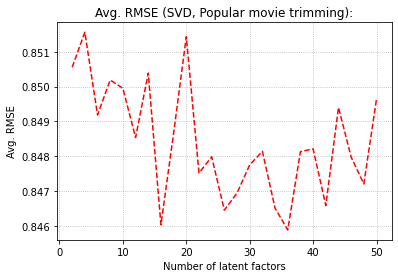

In [140]:
plt.plot(k,rmse_SVD_pop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q26.png',dpi=300,bbox_inches='tight')
plt.show()

In [141]:
print("Minimum avg. RMSE (SVD, Popular movie trimming):", min(rmse_SVD_pop))

Minimum avg. RMSE (SVD, Popular movie trimming): 0.8458905703396464


# Question 27

In [142]:
rmse_SVD_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_unpop.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


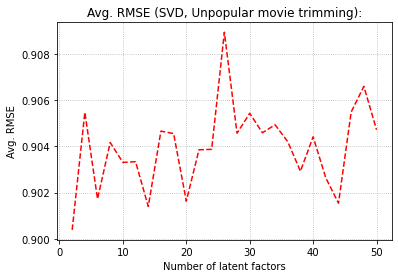

In [143]:
plt.plot(k,rmse_SVD_unpop,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q27.png',dpi=300,bbox_inches='tight')
plt.show()

In [144]:
print("Minimum avg. RMSE (SVD, Unpopular movie trimming):", min(rmse_SVD_unpop))

Minimum avg. RMSE (SVD, Unpopular movie trimming): 0.900390027866829


# Question 28

In [145]:
rmse_SVD_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


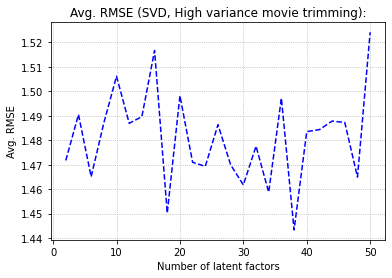

In [146]:
plt.plot(k,rmse_SVD_var,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (SVD, High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.savefig('Q28.png',dpi=300,bbox_inches='tight')
plt.show()

In [147]:
print("Minimum avg. RMSE (SVD, High variance movie trimming):", min(rmse_SVD_var))

Minimum avg. RMSE (SVD, High variance movie trimming): 1.4432989104828147


# Question 29

In [148]:
k = k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = SVD(n_factors=k,n_epochs=20,verbose=False).fit(trainset).test(testset)

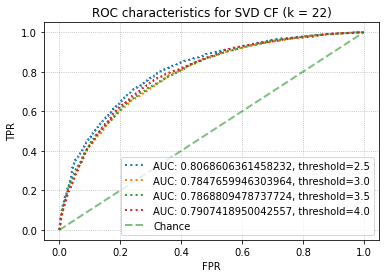

In [150]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD CF (k = '+ str(k)+')')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q29.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 30

In [224]:
user_ID_set = list(set(user_ID))
mean_ratings = []
for user in user_ID_set:
    idx = np.where(user_ID == user)
    mean_ratings.append(np.mean(rating[idx]))

In [228]:
kf = KFold(n_splits=10)
local_rmse = []
for trainset, testset in kf.split(ratings_dataset):
    res = [mean_ratings[int(row[0])-1] for row in testset]
    gt = [row[2] for row in testset]
    local_rmse.append(mean_squared_error(gt,res,squared=False))
rmse_naive = np.mean(local_rmse)

In [229]:
print('Avg. RMSE for Naive Filtering: ',rmse_naive)

Avg. RMSE for Naive Filtering:  0.9346899216061322


# Question 31

In [257]:
local_rmse_naive_pop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]<=2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_pop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_pop = np.mean(local_rmse_naive_pop)

In [258]:
print('Avg. RMSE for Naive Filtering (Popular movie trimming): ',rmse_naive_pop)

Avg. RMSE for Naive Filtering (Popular movie trimming):  0.9241698952751272


# Question 32

In [261]:
local_rmse_naive_unpop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]>2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_unpop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_unpop = np.mean(local_rmse_naive_unpop)

In [262]:
print('Avg. RMSE for Naive Filtering (Unpopular movie trimming): ',rmse_naive_unpop)

Avg. RMSE for Naive Filtering (Unpopular movie trimming):  0.9545871807615829


# Question 33

In [263]:
local_rmse_naive_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for trainset, testset in kf.split(ratings_dataset):
    trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_var.append(mean_squared_error(gt,res,squared=False))
rmse_naive_var = np.mean(local_rmse_naive_var)

In [264]:
print('Avg. RMSE for Naive Filtering (Unpopular movie trimming): ',rmse_naive_var)

Avg. RMSE for Naive Filtering (Unpopular movie trimming):  1.466818523657904


# Question 34

In [265]:
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res_SVD  = SVD(n_factors=22,n_epochs=20,verbose=False).fit(trainset).test(testset)
res_NMF  = NMF(n_factors=16,n_epochs=50,verbose=False).fit(trainset).test(testset)
res_KNN = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

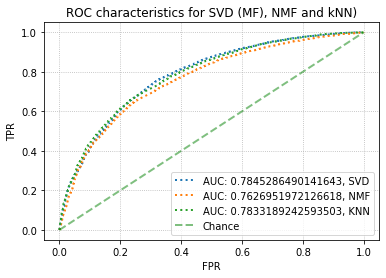

In [268]:
fig, ax = plt.subplots()
thresholded_out = []
for row in res_SVD:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_SVD])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', SVD')  

thresholded_out = []
for row in res_NMF:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_NMF])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', NMF')  

thresholded_out = []
for row in res_KNN:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_KNN])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', KNN')  

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD (MF), NMF and kNN)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Q34.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 36

In [303]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [304]:
prec_list_knn = []
rec_list_knn = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_knn.append(np.mean(precision_set))
    rec_list_knn.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


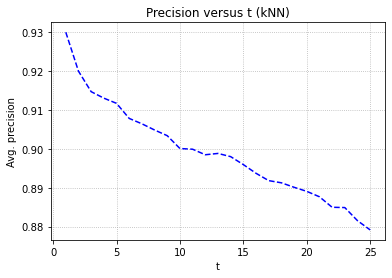

In [305]:
plt.plot(t,prec_list_knn,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (kNN)')
plt.ylabel('Avg. precision')
plt.xlabel('t')
plt.savefig('Q36a.png',dpi=300,bbox_inches='tight')
plt.show()

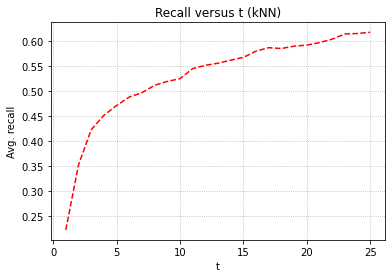

In [306]:
plt.plot(t,rec_list_knn,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Recall versus t (kNN)')
plt.ylabel('Avg. recall')
plt.xlabel('t')
plt.savefig('Q36b.png',dpi=300,bbox_inches='tight')
plt.show()

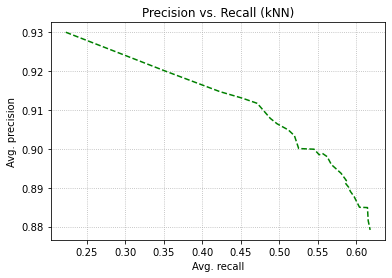

In [308]:
plt.plot(rec_list_knn,prec_list_knn,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (kNN)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.savefig('Q36c.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 37

In [310]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [311]:
prec_list_nmf = []
rec_list_nmf = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = NMF(n_factors=16,n_epochs=50,verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_nmf.append(np.mean(precision_set))
    rec_list_nmf.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


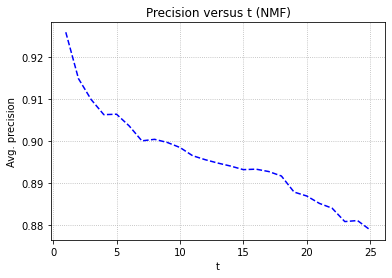

In [312]:
plt.plot(t,prec_list_nmf,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('t')
plt.savefig('Q37a.png',dpi=300,bbox_inches='tight')
plt.show()

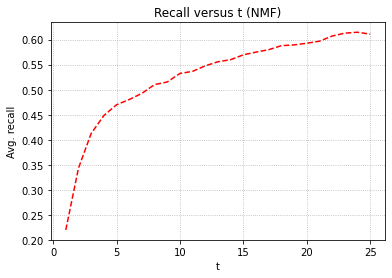

In [313]:
plt.plot(t,rec_list_nmf,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Recall versus t (NMF)')
plt.ylabel('Avg. recall')
plt.xlabel('t')
plt.savefig('Q37b.png',dpi=300,bbox_inches='tight')
plt.show()

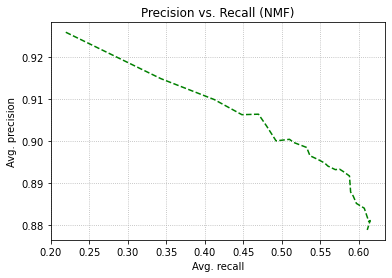

In [314]:
plt.plot(rec_list_nmf,prec_list_nmf,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.savefig('Q37c.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 38

In [315]:
t = np.arange(1,26,1)
kf = KFold(n_splits=10)

In [316]:
prec_list_svd = []
rec_list_svd = []
for val in t:
    print('Testing for t =',val)
    precision_set = []
    recall_set = []
    for trainset, testset in kf.split(ratings_dataset):
        G = {} #dictionary of movies liked by users
        for row in testset:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in testset:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        mod_testset = [row for row in testset if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = SVD(n_factors=22,n_epochs=20,verbose=False).fit(trainset).test(mod_testset)
        est_rat = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in est_rat.keys():
                est_rat[row[0]].append((row[1],row[3]))
            else:
                est_rat[row[0]] = []
                est_rat[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in est_rat.keys():
            S_all = est_rat[item]
            S_all = sorted(S_all,key=lambda x:x[1],reverse=True)
            S_t = set([row[0] for row in S_all[0:val]])
            precision_u.append(len(S_t.intersection(G[item]))/float(len(S_t)))
            recall_u.append(len(S_t.intersection(G[item]))/float(len(G[item])))
        precision_set.append(np.mean(precision_u))
        recall_set.append(np.mean(recall_u))
    prec_list_svd.append(np.mean(precision_set))
    rec_list_svd.append(np.mean(recall_set))

Testing for t = 1
Testing for t = 2
Testing for t = 3
Testing for t = 4
Testing for t = 5
Testing for t = 6
Testing for t = 7
Testing for t = 8
Testing for t = 9
Testing for t = 10
Testing for t = 11
Testing for t = 12
Testing for t = 13
Testing for t = 14
Testing for t = 15
Testing for t = 16
Testing for t = 17
Testing for t = 18
Testing for t = 19
Testing for t = 20
Testing for t = 21
Testing for t = 22
Testing for t = 23
Testing for t = 24
Testing for t = 25


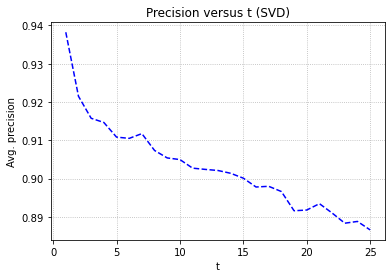

In [317]:
plt.plot(t,prec_list_svd,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Precision versus t (SVD)')
plt.ylabel('Avg. precision')
plt.xlabel('t')
plt.savefig('Q38a.png',dpi=300,bbox_inches='tight')
plt.show()

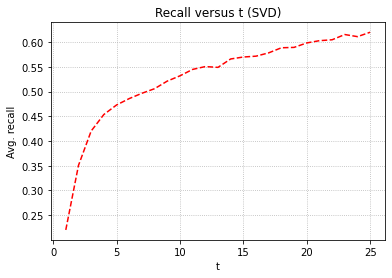

In [318]:
plt.plot(t,rec_list_svd,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Recall versus t (SVD)')
plt.ylabel('Avg. recall')
plt.xlabel('t')
plt.savefig('Q38b.png',dpi=300,bbox_inches='tight')
plt.show()

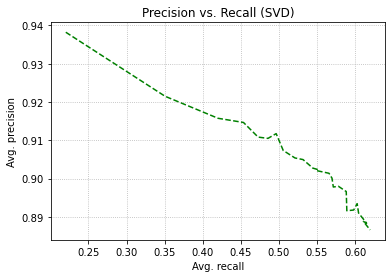

In [319]:
plt.plot(rec_list_svd,prec_list_svd,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (SVD)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.savefig('Q38c.png',dpi=300,bbox_inches='tight')
plt.show()

# Question 39

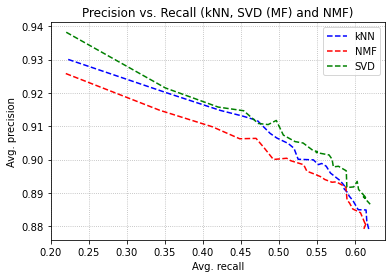

In [320]:
fig, ax = plt.subplots()
ax.plot(rec_list_knn,prec_list_knn,linestyle='--',color='b',label='kNN')
ax.plot(rec_list_nmf,prec_list_nmf,linestyle='--',color='r',label='NMF')
ax.plot(rec_list_svd,prec_list_svd,linestyle='--',color='g',label='SVD')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (kNN, SVD (MF) and NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.legend(loc="best")
plt.savefig('Q39.png',dpi=300,bbox_inches='tight')
plt.show()